## About Dataset

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

## Inspiration

US-Accidents can be used for numerous applications such as real-time car accident prediction, studying car accidents hotspot locations, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful to study the impact of COVID-19 on traffic behavior and accidents.

## Our Purpose

The first objective of this project is to recognize key factors affecting the accident severity(i.e. **an indication of the effect the accident has on traffic**). The second one is to develop a model that can accurately predict accident severity. To be specific, for a given accident, without any detailed information about itself, like driver attributes or vehicle type, this model is supposed to be able to predict the likelihood of this accident being a severe one. The accident could be the one that just happened and still lack of detailed information, or a potential one predicted by other models. Therefore, with the sophisticated real-time traffic accident prediction solution developed by the creators of the same dataset used in this project, this model might be able to further predict severe accidents in real-time.

## Overview of dataset


#### Traffic Attributes (10):

* ID: This is a unique identifier of the accident record.

* Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* Start_Time: Shows start time of the accident in local time zone.

* End_Time: Shows end time of the accident in local time zone.

* Start_Lat: Shows latitude in GPS coordinate of the start point.

* Start_Lng: Shows longitude in GPS coordinate of the start point.

* End_Lat: Shows latitude in GPS coordinate of the end point.

* End_Lng: Shows longitude in GPS coordinate of the end point.

* Distance(mi): The length of the road extent affected by the accident.

* Description: Shows natural language description of the accident.

#### Address Attributes (9):

* Number: Shows the street number in address field.

* Street: Shows the street name in address field.

* Side: Shows the relative side of the street (Right/Left) in address field.

* City: Shows the city in address field.

* County: Shows the county in address field.

* State: Shows the state in address field.

* Zipcode: Shows the zipcode in address field.

* Country: Shows the country in address field.

* Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

#### Weather Attributes (11):

* Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

* Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

* Temperature(F): Shows the temperature (in Fahrenheit).

* Wind_Chill(F): Shows the wind chill (in Fahrenheit).

* Humidity(%): Shows the humidity (in percentage).

* Pressure(in): Shows the air pressure (in inches).

* Visibility(mi): Shows visibility (in miles).

* Wind_Direction: Shows wind direction.

* Wind_Speed(mph): Shows wind speed (in miles per hour).

* Precipitation(in): Shows precipitation amount in inches, if there is any.

* Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

#### POI Attributes (13):

* Amenity: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* Crossing: A POI annotation which indicates presence of crossing in a nearby location.

* Give_Way: A POI annotation which indicates presence of give_way sign in a nearby location.

* Junction: A POI annotation which indicates presence of junction in a nearby location.

* No_Exit: A POI annotation which indicates presence of no_exit sign in a nearby location.

* Railway: A POI annotation which indicates presence of railway in a nearby location.

* Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

* Station: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* Stop: A POI annotation which indicates presence of stop sign in a nearby location.

* Traffic_Calming: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

* Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

#### Period-of-Day (4):

* Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

* Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

* Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.



In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from collections import Counter

# 1. Overview & Preprocessing

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.shape

(2845342, 47)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


### Insights

* This tells that majority of accidents have severity ~2 means not much higher impact on traffic.
* In approx 75% cases no precipitation was recorded so this could mean rain is not the reason for accidents.
* on an avg accidents happen even while the visibility is ~9 miles so this could mean that visibility is not a reason.
* average length of the road extent affected by the accident is 7 miles

**Fixing time stamps as they are in object type**

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

**Features 'ID' doesn't provide any useful information about accidents themselves. 'Distance(mi)', 'End_Time' (we have start time), 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction. For 'Description', the POI features have already been extracted from it by dataset creators. Let's get rid of these features first.**

In [8]:
df = df.drop(['ID','Description','Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng'], axis=1)

In [9]:
df.shape

(2845342, 41)

In [10]:
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
    print(i,df[i].unique().size)

Unique count of categorical features:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


**'Country' and 'Turning_Loop' for they have only one class. So, we have to drop them otherwise we will get error at the time of splitting the dataset...**

In [11]:
df = df.drop(['Country','Turning_Loop'], axis=1)

In [12]:
df.Wind_Direction.unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [13]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

**we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. It is necessary to clean them up first.**

In [14]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


**According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. To extract these three weather conditions, we first look at what we have in 'Weather_Condition' Feature.**

In [15]:
# show distinctive weather conditions 
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Nearby', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Volcanic

In [16]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False),1, 0)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)

In [17]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow',
       'Heavy_Snow', 'Fog'],
      dtype='object')

In [18]:
# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

In [19]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Clear',
       'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog'],
      dtype='object')

**The 'Weather_Timestamp' is almost as same as 'Start_Time', we can just keep 'Start_Time'. Then map 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour', and 'Minute' (in a day).**

In [20]:
(df.Weather_Timestamp-df.Start_Time).mean()

Timedelta('0 days 00:01:11.643297838')

In [21]:
df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
print(days_each_month)
nday = [days_each_month[arg-1] for arg in df['Month'].values]
nday = nday + df["Start_Time"].dt.day.values
print(nday)

df['Day'] = nday
df['Hour'] = df['Start_Time'].dt.hour
df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

[  0  31  59  90 120 151 181 212 243 273 304 334 365]
[ 39  39  39 ... 235 235 235]


,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 00:37:08,2016,2,0,39,0,37.0
1,2016-02-08 05:56:20,2016,2,0,39,5,356.0
2,2016-02-08 06:15:39,2016,2,0,39,6,375.0
3,2016-02-08 06:51:45,2016,2,0,39,6,411.0
4,2016-02-08 07:53:43,2016,2,0,39,7,473.0


# 2. Handling missing data & duplicates

In [22]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,Number,Street,Side,City,County,State,...,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute
0,3,2016-02-08 00:37:08,40.108910,-83.092860,NaN,Outerbelt E,R,Dublin,Franklin,OH,...,0,0,0,0,2016,2,0,39,0,37.0
1,2,2016-02-08 05:56:20,39.865420,-84.062800,NaN,I-70 E,R,Dayton,Montgomery,OH,...,0,0,0,0,2016,2,0,39,5,356.0
2,2,2016-02-08 06:15:39,39.102660,-84.524680,NaN,I-75 S,R,Cincinnati,Hamilton,OH,...,0,0,0,0,2016,2,0,39,6,375.0
3,2,2016-02-08 06:51:45,41.062130,-81.537840,NaN,I-77 N,R,Akron,Summit,OH,...,0,0,0,0,2016,2,0,39,6,411.0
4,3,2016-02-08 07:53:43,39.172393,-84.492792,NaN,I-75 S,R,Cincinnati,Hamilton,OH,...,0,0,0,0,2016,2,0,39,7,473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,34.002480,-117.379360,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,...,0,0,0,0,2019,8,4,235,18,1083.0
2845338,2,2019-08-23 19:11:30,32.766960,-117.148060,NaN,I-8 W,R,San Diego,San Diego,CA,...,0,0,0,0,2019,8,4,235,19,1151.0
2845339,2,2019-08-23 19:00:21,33.775450,-117.847790,NaN,Garden Grove Fwy,R,Orange,Orange,CA,...,0,0,0,0,2019,8,4,235,19,1140.0
2845340,2,2019-08-23 19:00:21,33.992460,-118.403020,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,...,0,0,0,0,2019,8,4,235,19,1140.0


In [23]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.sort_values(by='Missing_Percent(%)',ascending=False )

,Feature,Missing_Percent(%)
4,Number,61.290031
20,Precipitation(in),19.310789
14,Wind_Chill(F),16.505678
19,Wind_Speed(mph),5.550967
18,Wind_Direction,2.592834
15,Humidity(%),2.568830
40,Heavy_Rain,2.482514
42,Heavy_Snow,2.482514
43,Fog,2.482514
41,Snow,2.482514


**Dropping Number as it contains very much Nan values...**

In [24]:
df = df.drop(['Number'], axis=1)

In [25]:
df.shape

(2845342, 49)

**Dropping Nan rows from the following columns as they have very less missing value percentage**

**Dropping those whose missing value percentage less or equal to 5%**

In [26]:
print(missing[(missing['Missing_Percent(%)']>0) & (missing['Missing_Percent(%)']<6)]['Feature'].to_list())

['Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog']


In [27]:
df = df.dropna(subset=['Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)',
                       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 
                       'Wind_Speed(mph)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 
                       'Astronomical_Twilight', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow',
                       'Heavy_Snow', 'Fog'])

In [28]:
df.isna().sum()

Severity                      0
Start_Time                    0
Start_Lat                     0
Start_Lng                     0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Timezone                      0
Airport_Code                  0
Temperature(F)                0
Wind_Chill(F)            300266
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)               0
Precipitation(in)        414966
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_

**Now we remained with 'Precipitation(in)' & 'Wind_Chill(F)' which contains high missing values and both are continuous so we can replace them by mean/median based on their distribution**

<AxesSubplot: >

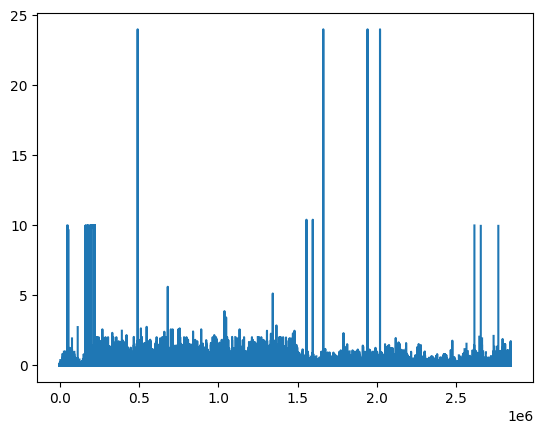

In [29]:
df['Precipitation(in)'].plot()

<AxesSubplot: >

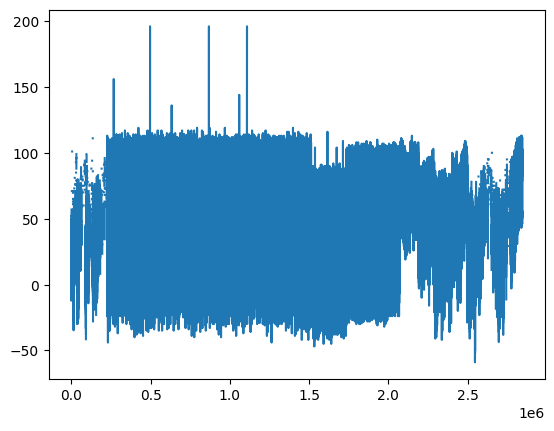

In [30]:
df['Wind_Chill(F)'].plot()

**Both are not normally distributed so we can replace their missing values by median...**

In [31]:
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].median())

In [32]:
df.isna().sum()

Severity                 0
Start_Time               0
Start_Lat                0
Start_Lng                0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Clear                    0
C

**CHECKING DUPLICATES & DROPPING IT...**

In [33]:
df.duplicated().sum()

224548

In [34]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [35]:
df.shape

(2431335, 49)

In [36]:
# df.to_csv('US_accidents_24lac.csv',index=False)

# 3. Exploratory Data Analysis

**First we'll check our target column i.e. Severity**

In [37]:
df.Severity.value_counts()

2    2162575
3     134090
4     110136
1      24534
Name: Severity, dtype: int64

## 3.1 Balancing the target

**We Know that the accidents with severity level 4 are much more serious than accidents of other levels. Therefore, I decided to focus on level 4 accidents and regroup the levels of severity into level 4 versus other levels.**

In [38]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

0    2321199
1     110136
Name: Severity4, dtype: int64

* 0 ---> Accidents are of normal condition
* 1 ---> Accidents are very serious in condition

In [39]:
df1 = df[df['Severity4']==0][:110000]
df2 = df[df['Severity4']==1][:110000]
df_bl = pd.concat([df1,df2])

In [40]:
df_bl.shape

(220000, 49)

In [41]:
df_bl.Severity4.value_counts()

0    110000
1    110000
Name: Severity4, dtype: int64

## 3.2 Time Features

### Year

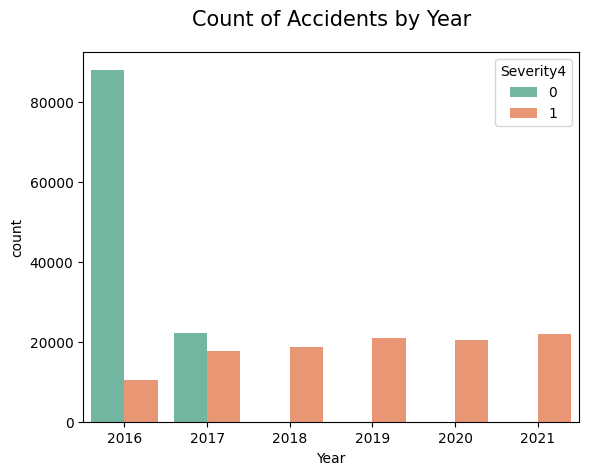

In [42]:
df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,palette="Set2", order=sorted(df_bl.Year.unique()))
plt.title('Count of Accidents by Year', size=15, y=1.05)
plt.show()

**The number of other levels accident is totally decreased after 2017 but severity level 4 accidents are quite constant**

### Month

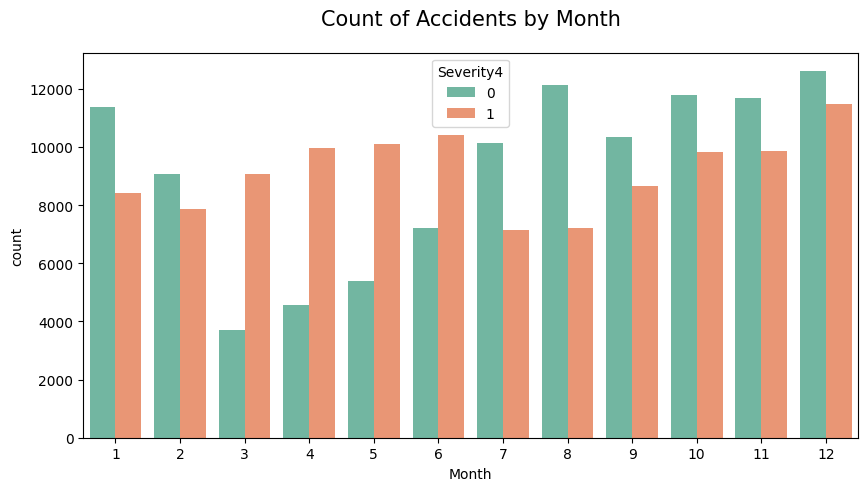

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Month', size=15, y=1.05)
plt.show()

**You can see that other level accidents are quite constant from July to Feb but number of level 4 accidents rapidly increases from July to December and are constant in between January to May**

### Weekday

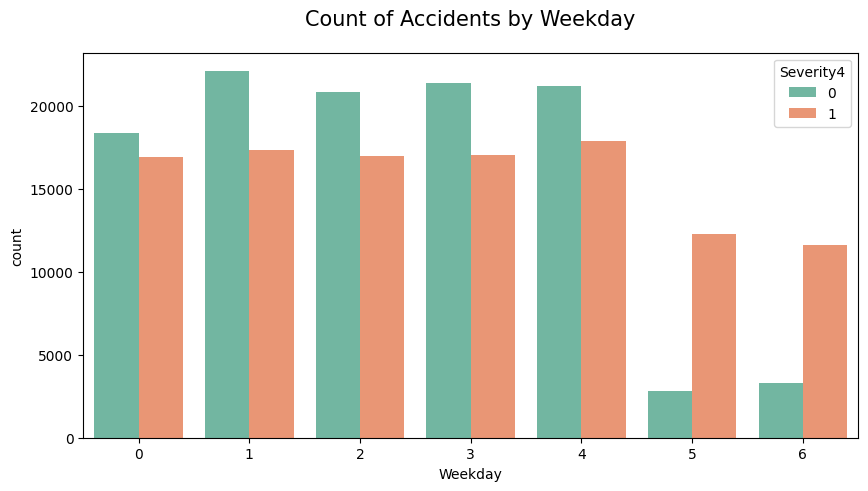

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Weekday', size=15, y=1.05)
plt.show()

**The number of accidents was much less on weekends while the proportion of level 4 accidents was higher.**

### Period-of-Day

C:\Users\hp\AppData\Local\Temp\ipykernel_17728\2370649679.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


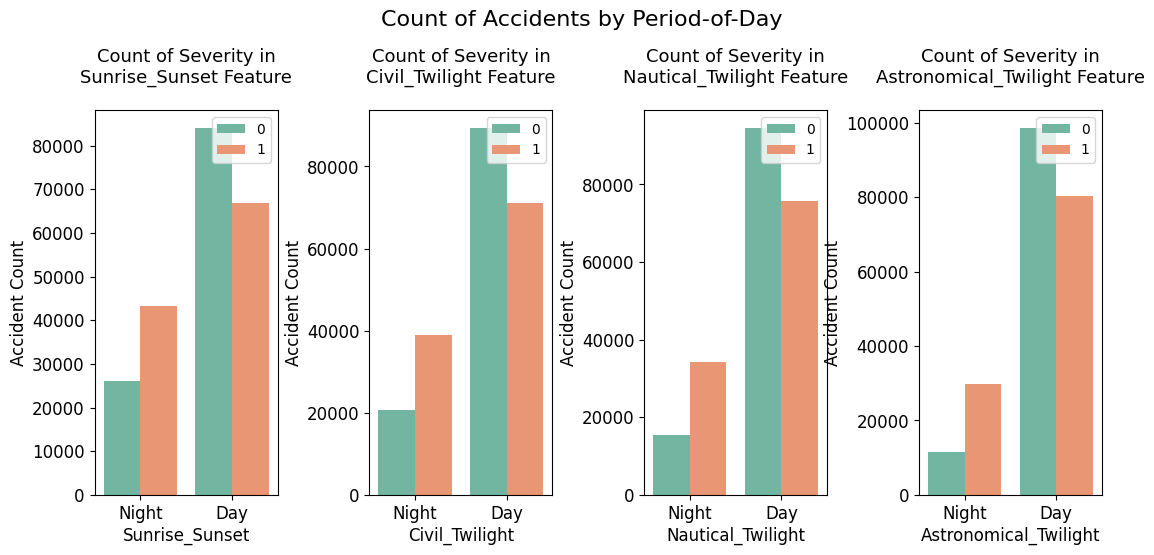

In [45]:
period_features = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))
plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(period_features, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day',y=1.08, fontsize=16)
plt.show()

**Its very obvious that Accidents happen less at night but level4 accidents are higher, It means most of the serious accidents happens at night time**

**One more insight is that all of them are behaving in same manner.. So, one should kept and other should be dropped**

### Hour

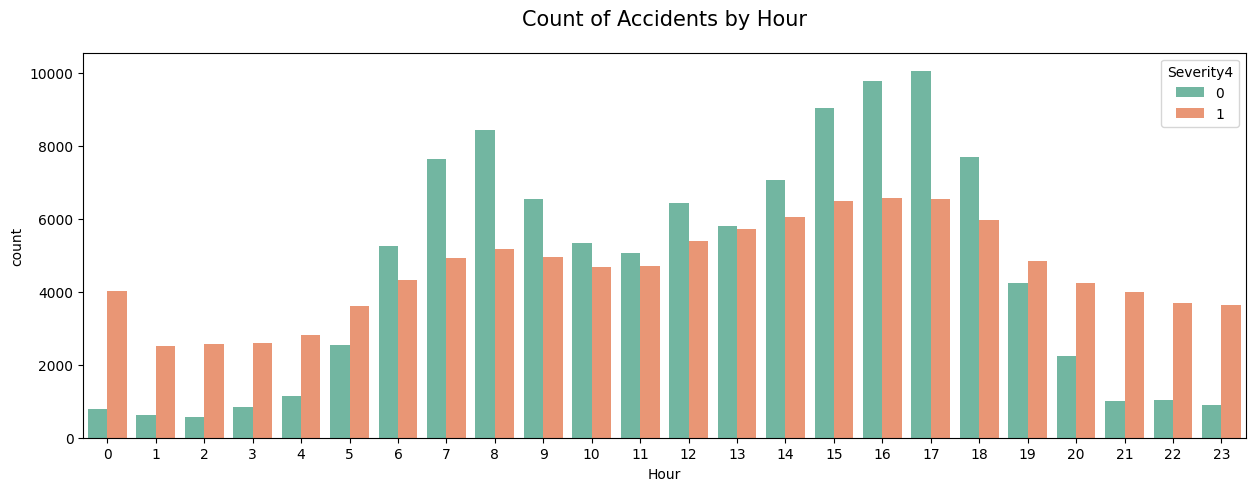

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Hour', size=15, y=1.05)
plt.show()

**Most accidents happened during the daytime, especially AM peak and PM peak. When it comes to night, accidents were far less but more likely to be serious.**

## 3.3 Address Features

### Timezone

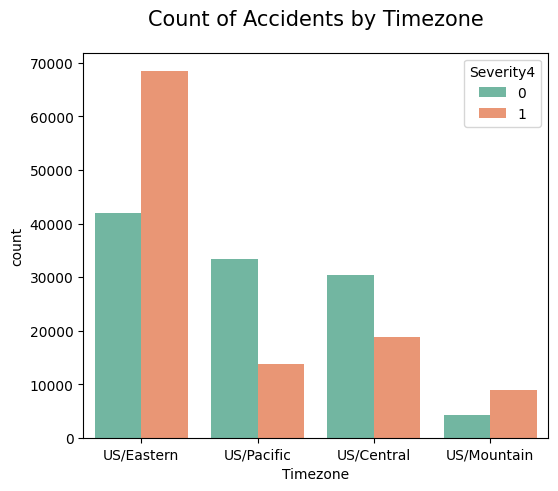

In [47]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Timezone", size=15, y=1.05)
plt.show()

**Eastern timezone is most dangerous one...**

### State

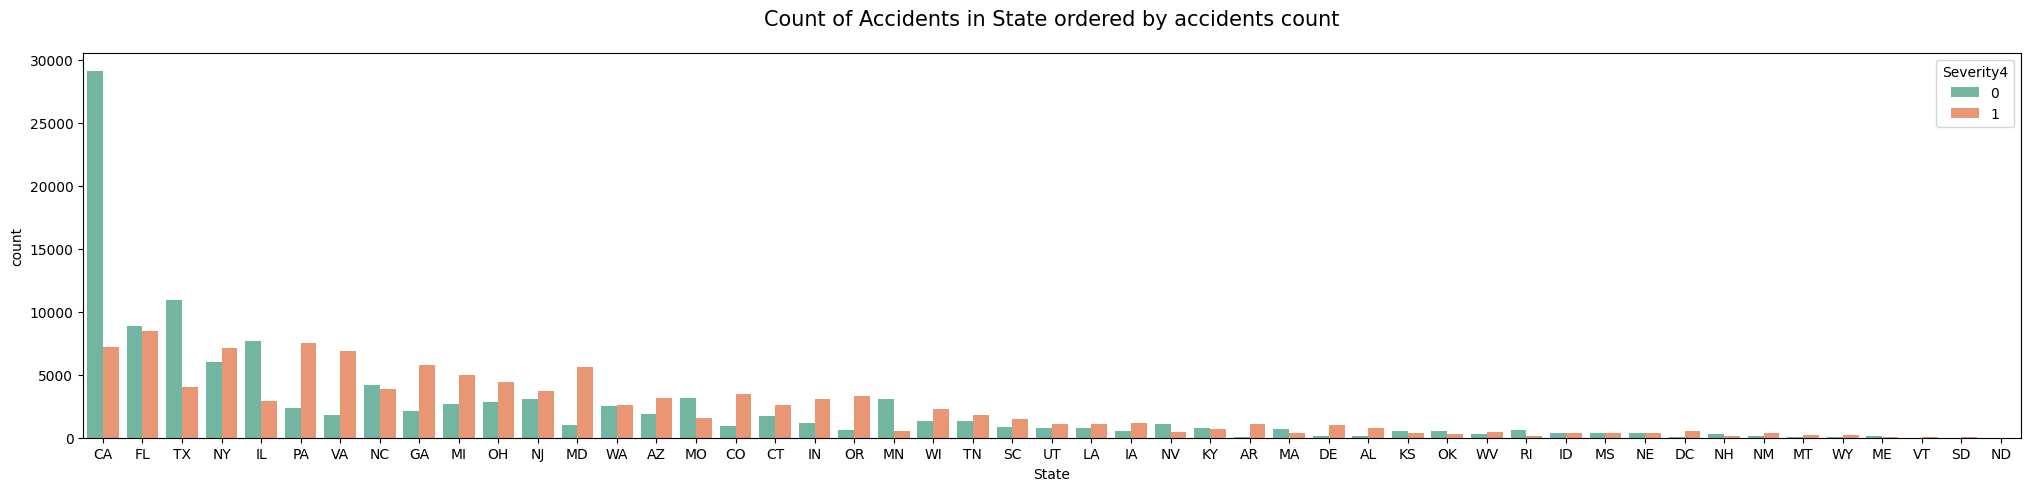

In [48]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', 
                      data=df_bl ,palette="Set2", order=df_bl['State'].value_counts().index)
plt.title("Count of Accidents in State ordered by accidents count", size=15, y=1.05)
plt.show()

**FL, CA, and TX are the top 3 states with the most accidents.**

### Side

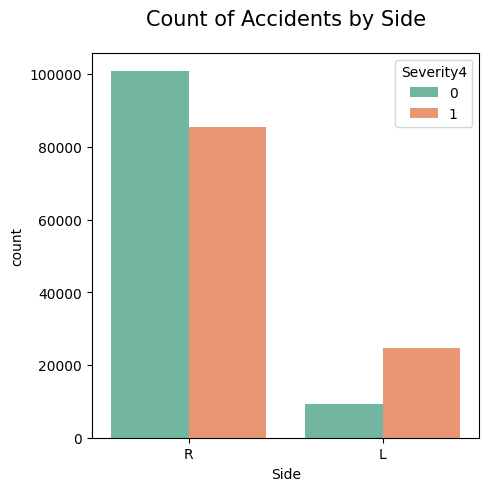

In [49]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Side", size=15, y=1.05)
plt.show()

**Right side of the line is much more dangerous than left side.**

In [50]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','State']
for i in fre_list:
    print(i,'--->',df[i].nunique())

Street ---> 154064
City ---> 10788
County ---> 1668
Zipcode ---> 347059
Airport_Code ---> 1947
State ---> 49


**'Street', 'City', 'County', 'Zipcode', 'Airport_Code','State'**

**These above columns contains very much categories which makes our data complex when dummy columns are created
We can do some analysis also But for time being we consider to drop these columns...**

In [51]:
df_bl = df_bl.drop(fre_list, axis  = 1)

## 3.4 Weather Features

### Weather conditions

C:\Users\hp\AppData\Local\Temp\ipykernel_17728\425222714.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i)
C:\Users\hp\AppData\Local\Temp\ipykernel_17728\425222714.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i)
C:\Users\hp\AppData\Local\Temp\ipykernel_17728\425222714.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i)
C:\Users\hp\AppData\Local\Temp\ipykernel_17728\425222714.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as

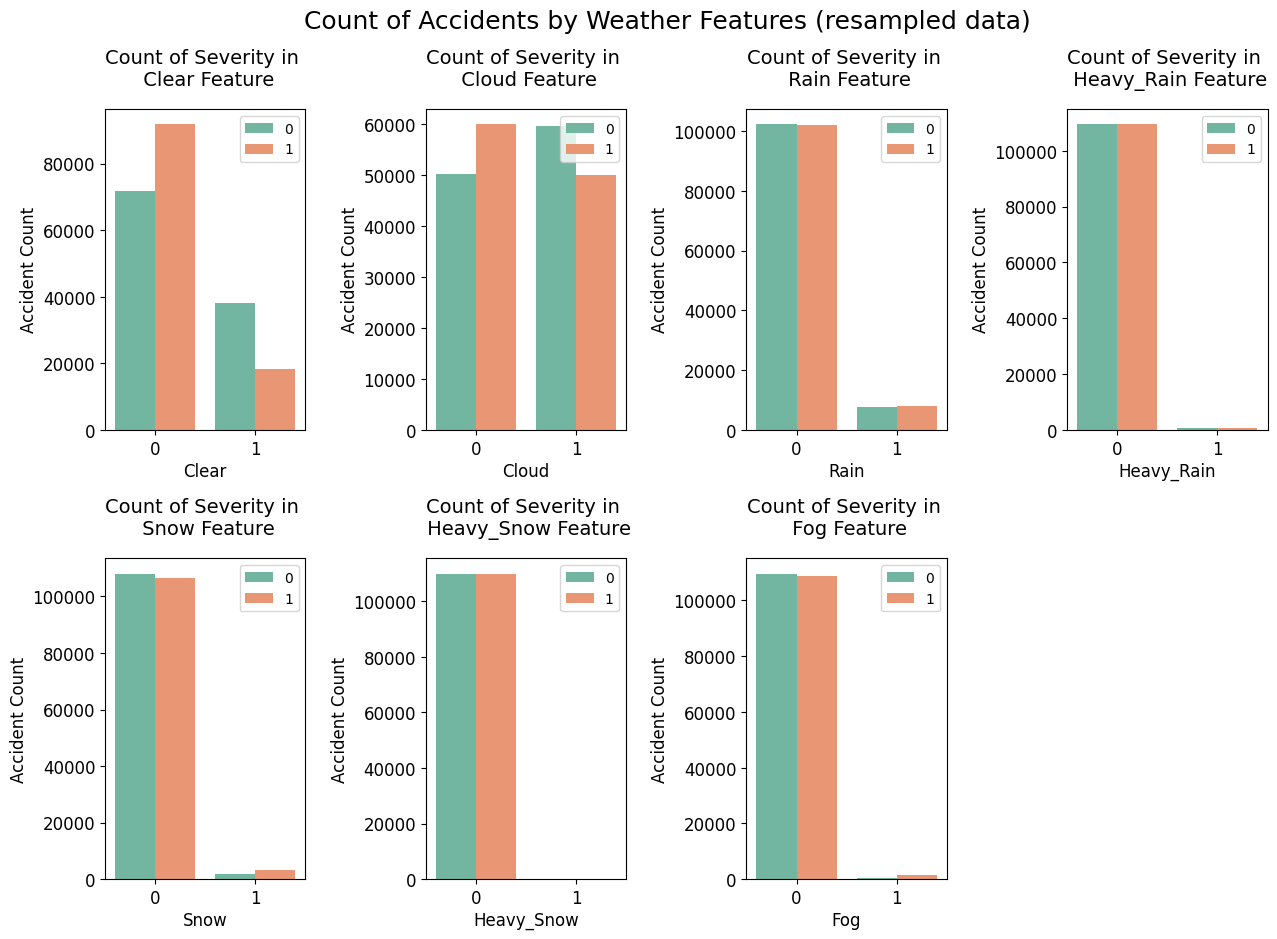

In [52]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()


**As seen from above, accidents are little more likely to be serious during rain or snow while less likely on a cloudy day.**

In [53]:
df_bl = df_bl.drop(['Heavy_Rain','Heavy_Snow','Fog'], axis  = 1)

In [54]:
df_bl.shape

(220000, 40)

### Wind Directions

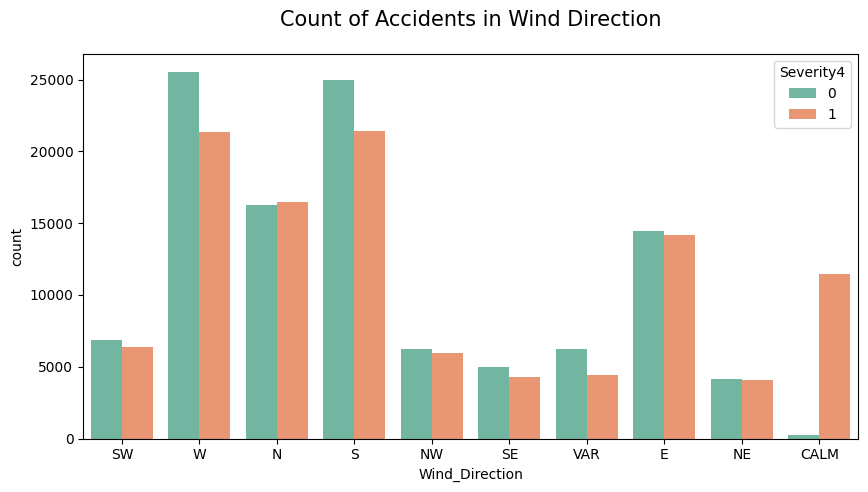

In [55]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents in Wind Direction", size=15, y=1.05)
plt.show()

**Both Class of severity is performing same in every category of Wind direction... So it cant give any inference**

In [56]:
df_bl = df_bl.drop(['Wind_Direction'], axis  = 1)

In [57]:
df_bl.shape

(220000, 39)

## 3.5 Point of Interest (POI) features

C:\Users\hp\AppData\Local\Temp\ipykernel_17728\2149941739.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i)
C:\Users\hp\AppData\Local\Temp\ipykernel_17728\2149941739.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i)
C:\Users\hp\AppData\Local\Temp\ipykernel_17728\2149941739.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i)
C:\Users\hp\AppData\Local\Temp\ipykernel_17728\2149941739.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove(

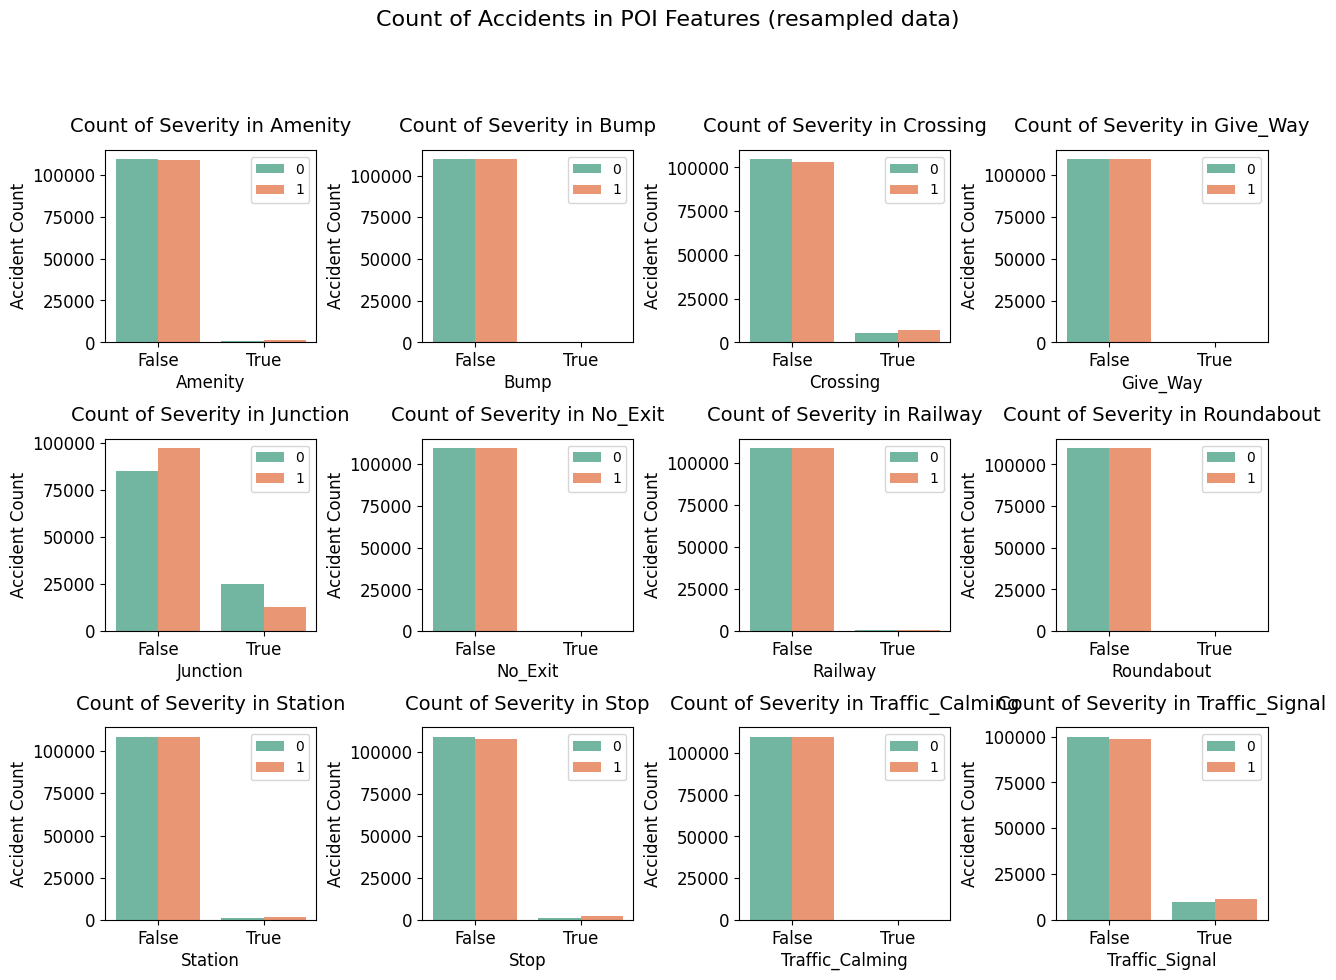

In [58]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit',
                'Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

**Accidents near traffic signal and crossing are much likely to be serious accidents while little less likely to be serious if they are near the junction. Other POI features are so unbalanced that it is hard to tell their relation with severity from plots.**

In [59]:
df_bl= df_bl.drop(['Amenity','Bump','Give_Way','No_Exit','Railway','Roundabout','Traffic_Calming'], axis=1)

In [60]:
df_bl.shape

(220000, 32)

## 3.6 Correlation

In [61]:
# one-hot encoding
df_bl[period_features] = df_bl[period_features].astype('category')
df_bl = pd.get_dummies(df_bl, columns=period_features)

C:\Users\hp\AppData\Local\Temp\ipykernel_17728\4284369261.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)


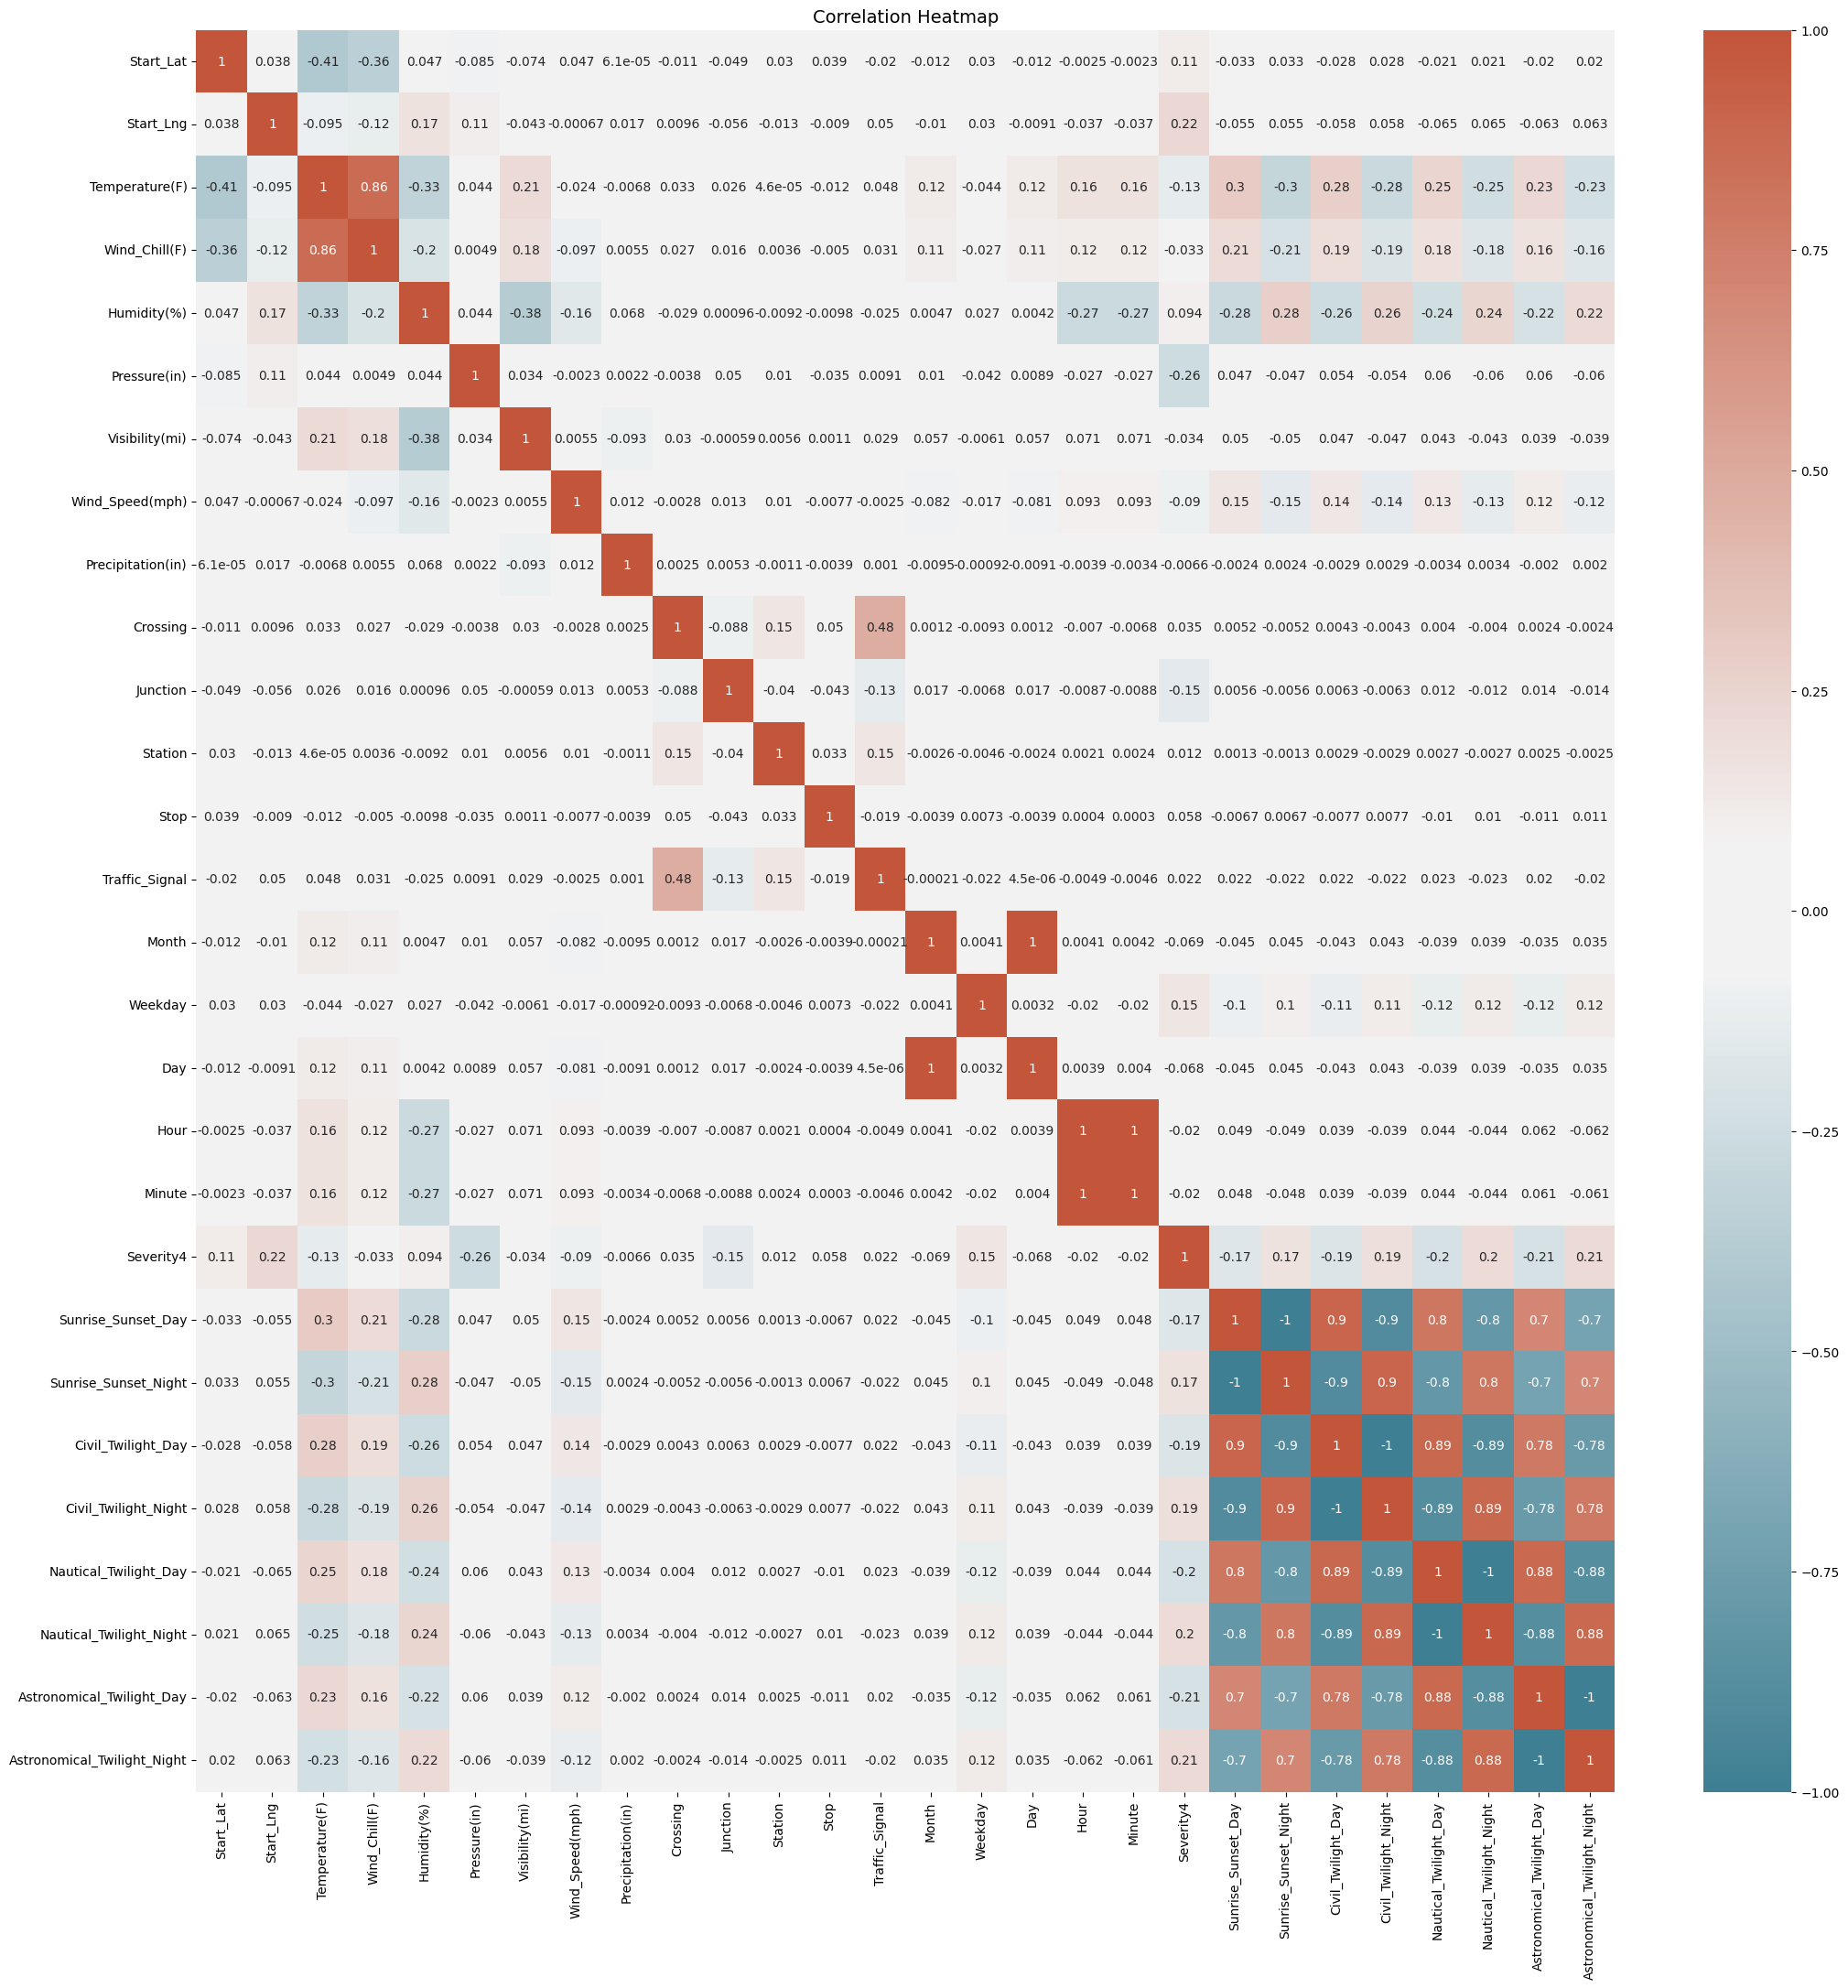

In [62]:
# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

**from these above correlation plot and based on some intution, we should drop certain columns...**

In [63]:
df_bl.columns

Index(['Start_Time', 'Start_Lat', 'Start_Lng', 'Side', 'Timezone',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Clear', 'Cloud',
       'Rain', 'Snow', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute',
       'Severity4', 'Sunrise_Sunset_Day', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Day', 'Civil_Twilight_Night', 'Nautical_Twilight_Day',
       'Nautical_Twilight_Night', 'Astronomical_Twilight_Day',
       'Astronomical_Twilight_Night'],
      dtype='object')

In [64]:
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = df_bl.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(df_bl.values, i) for i in range(len(df_bl.columns))]
  
# print(vif_data)

In [65]:
df_bl = df_bl.drop(['Sunrise_Sunset_Day', 'Sunrise_Sunset_Night', 'Civil_Twilight_Day',
       'Civil_Twilight_Night', 'Nautical_Twilight_Day',
       'Nautical_Twilight_Night', 'Astronomical_Twilight_Day','Hour','Start_Time','Day','Month',
        'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)','Precipitation(in)','Clear','Cloud','Snow','Year','Crossing'], axis=1)

In [66]:
df_bl.columns

Index(['Start_Lat', 'Start_Lng', 'Side', 'Timezone', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Junction', 'Station', 'Stop',
       'Traffic_Signal', 'Rain', 'Weekday', 'Minute', 'Severity4',
       'Astronomical_Twilight_Night'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_17728\380701697.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)


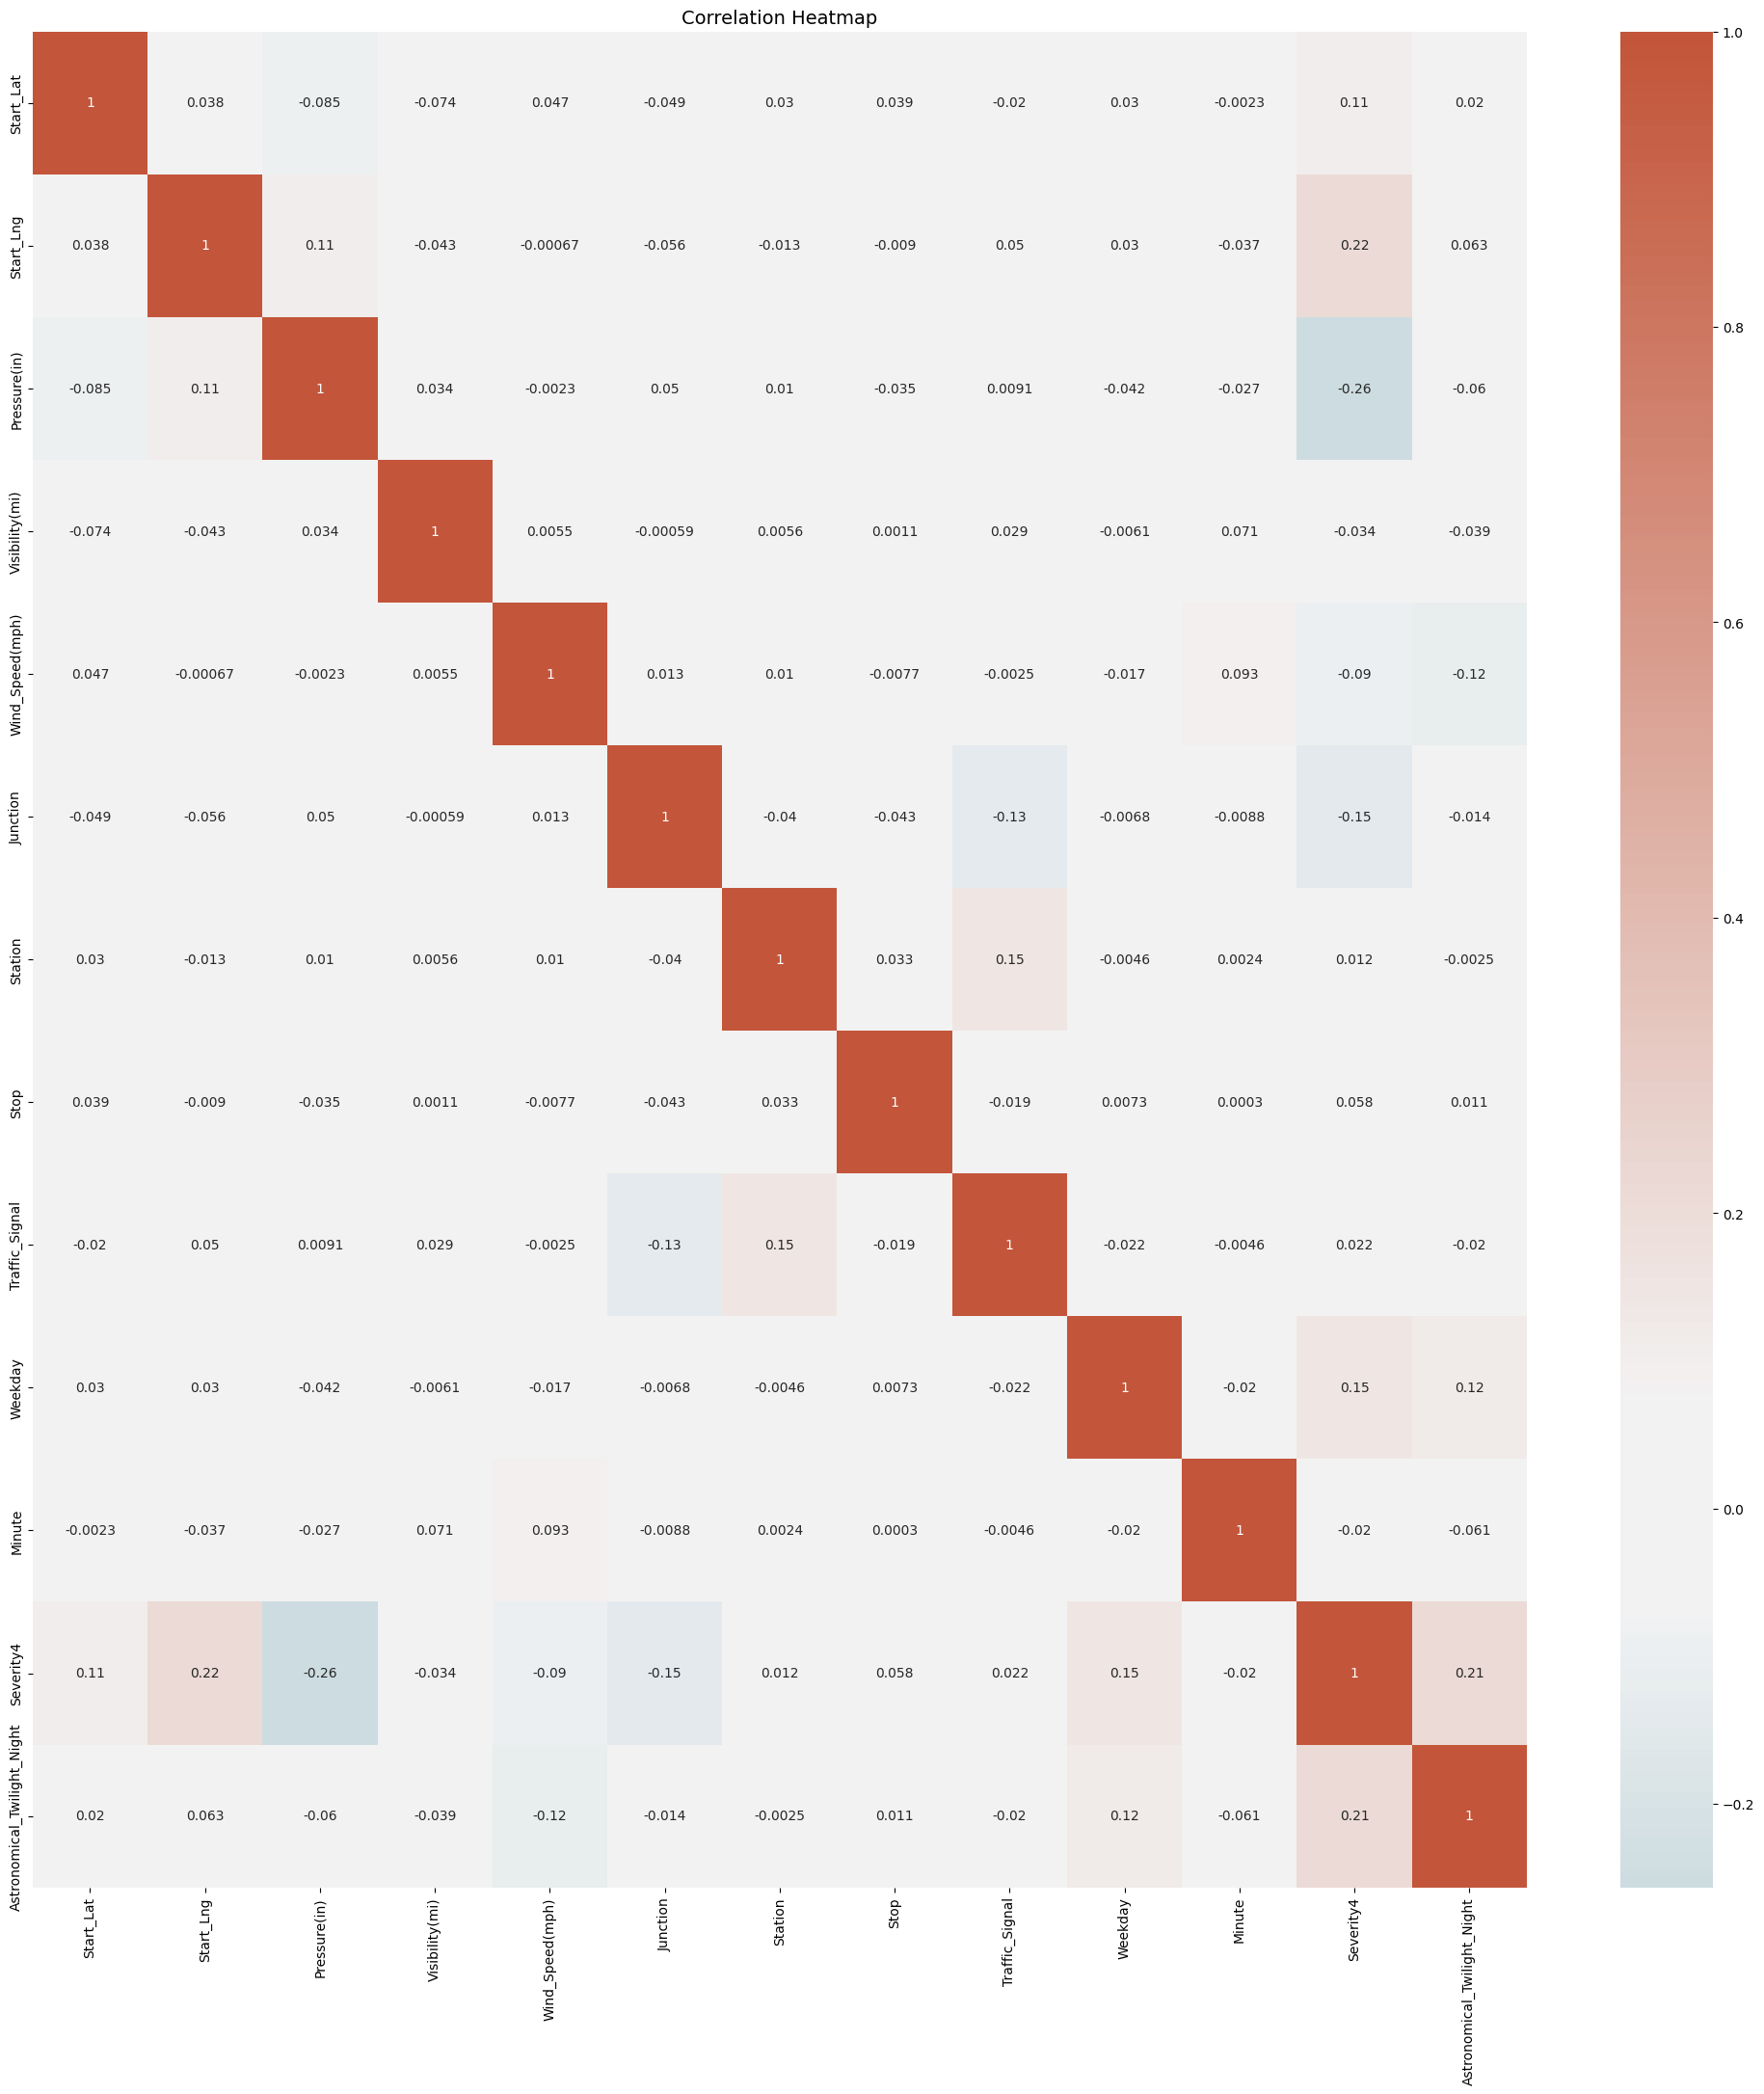

In [67]:
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_bl.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

## 3.7 One-Hot Encoding

In [68]:
df_bl = df_bl.replace([True, False], [1,0])

In [69]:
df_bl.head()

,Start_Lat,Start_Lng,Side,Timezone,Pressure(in),Visibility(mi),Wind_Speed(mph),Junction,Station,Stop,Traffic_Signal,Rain,Weekday,Minute,Severity4,Astronomical_Twilight_Night
0,40.108910,-83.092860,R,US/Eastern,29.76,10.0,10.4,0,0,0,0,1,0,37.0,0,1
1,39.172393,-84.492792,R,US/Eastern,29.69,10.0,10.4,0,0,0,0,1,0,473.0,0,0
2,39.063240,-84.032430,R,US/Eastern,29.66,10.0,8.1,0,0,0,1,0,0,496.0,0,0
3,39.775650,-84.186030,R,US/Eastern,29.63,3.0,2.3,0,0,0,0,0,0,495.0,0,0
4,41.375310,-81.820170,R,US/Eastern,29.63,0.5,3.5,1,0,0,0,0,0,711.0,0,0


In [70]:
df = df_bl

In [71]:
cat = ['Side','Timezone','Weekday']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220000 entries, 0 to 2429945
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Astronomical_Twilight_Night  220000 non-null  uint8  
 1   Side_R                       220000 non-null  uint8  
 2   Timezone_US/Eastern          220000 non-null  uint8  
 3   Timezone_US/Mountain         220000 non-null  uint8  
 4   Timezone_US/Pacific          220000 non-null  uint8  
 5   Weekday_1                    220000 non-null  uint8  
 6   Weekday_2                    220000 non-null  uint8  
 7   Weekday_3                    220000 non-null  uint8  
 8   Weekday_4                    220000 non-null  uint8  
 9   Weekday_5                    220000 non-null  uint8  
 10  Weekday_6                    220000 non-null  uint8  
 11  Junction                     220000 non-null  uint8  
 12  Station                      220000 non-null  uint8  
 13

# 4. Model

## 4.1 Train-Test split

In [72]:
# split X, y
X = df.drop('Severity4', axis=1)
y= df['Severity4']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 4.2 Logistic Regression with Fine tuning

In [73]:
# clf_base = LogisticRegression()
# grid = {  'penalty': ['l1', 'l2'],
#         'class_weight': ['balanced']
#         }
# clf_lr = GridSearchCV(clf_base, grid, cv=10, n_jobs=16, scoring='f1')

# clf_lr.fit(X_train, y_train)

# # coef = clf_lr.best_estimator_.coef_
# # intercept = clf_lr.best_estimator_.intercept_

# print (classification_report(y_test, clf_lr.predict(X_test)))

In [81]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (classification_report(y_test, y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.69      0.72      0.71     32903
           1       0.71      0.67      0.69     33097

    accuracy                           0.70     66000
   macro avg       0.70      0.70      0.70     66000
weighted avg       0.70      0.70      0.70     66000



## 4.3 Random Forest Classifier with Fine tuning

In [74]:
# clf_base = RandomForestClassifier()
# grid = {'n_estimators': [10, 50, 100],
#         'max_features': ['auto','sqrt']}
# clf_rf = GridSearchCV(clf_base, grid, cv=10, n_jobs=16, scoring='f1')

# clf_rf.fit(X_train, y_train)
# y_pred = clf_rf.predict(X_test)

# print (classification_report(y_test, y_pred))

In [75]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     32903
           1       0.87      0.84      0.86     33097

    accuracy                           0.86     66000
   macro avg       0.86      0.86      0.86     66000
weighted avg       0.86      0.86      0.86     66000



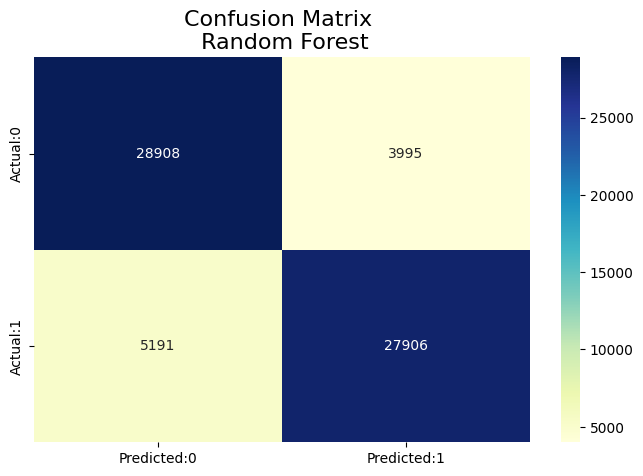

In [76]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Random Forest", fontsize=16)
plt.show()

### Lets check whether which features are important for us

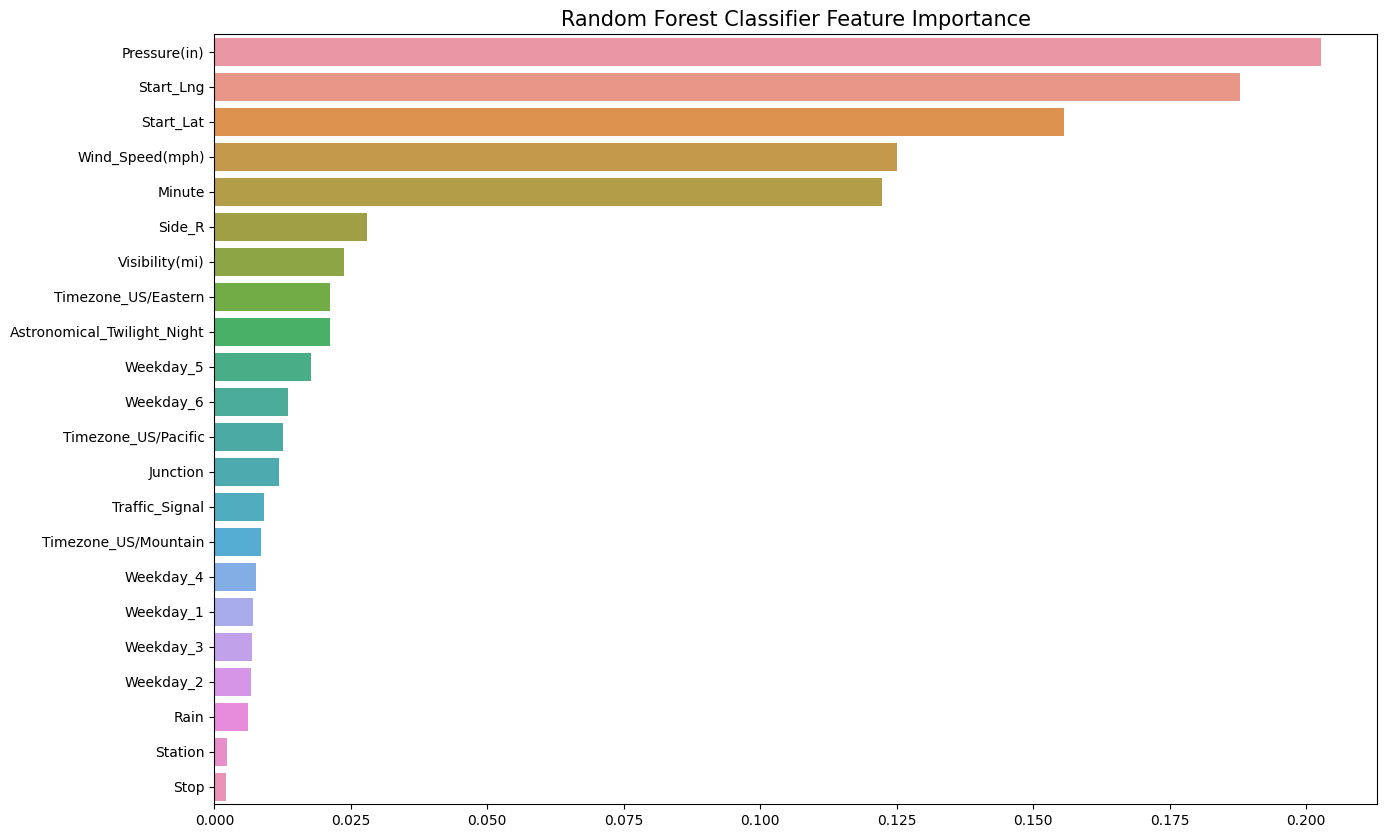

In [80]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=df.drop('Severity4',axis=1).columns)

importances.iloc[:,0] = model.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()

**The feature importance plot shows that high-resolution spatio-temporal patterns of accidents are the most useful features to predict severity.**